<a href="https://colab.research.google.com/github/FGalvao77/Criando-uma-RNA-simples-com-Keras-para-regressao/blob/main/Criando_uma_RNA_simples_com_Keras_para_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Criando uma RNA simples com Keras para regressão**
---
---

- https://keras.io/

In [1]:
!curl https://didatica.tech/wp-content/uploads/2023/02/admission_dataset.csv >> admission.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12322  100 12322    0     0  32256      0 --:--:-- --:--:-- --:--:-- 32172


In [2]:
!head admission.csv

GRE Score,TOEFL Score,University Rating,SOP,LOR ,CGPA,Research,Chance of Admit 
315,105,3,2.0,2.5,8.48,0,0.75
321,112,5,5.0,5.0,9.06,1,0.86
327,103,3,4.0,4.0,8.3,1,0.74
305,112,3,3.0,3.5,8.65,0,0.71
297,96,2,2.5,1.5,7.89,0,0.43
321,109,3,3.0,4.0,8.2,1,0.75
298,99,1,1.5,3.0,7.46,0,0.53
312,109,3,3.0,3.0,8.69,0,0.77
320,108,3,3.5,4.0,8.44,1,0.76


In [3]:
import keras

print(f'VERSION: {keras.__version__}')

VERSION: 2.11.0


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(
    filepath_or_buffer='admission.csv'
)

In [6]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,315,105,3,2.0,2.5,8.48,0,0.75
1,321,112,5,5.0,5.0,9.06,1,0.86
2,327,103,3,4.0,4.0,8.30,1,0.74
3,305,112,3,3.0,3.5,8.65,0,0.71
4,297,96,2,2.5,1.5,7.89,0,0.43


In [7]:
X  = df.drop(columns='Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [8]:
X_train, X_val = X[0:300], X[300:]
y_train, y_val = y[0:300], y[300:]

In [9]:
X_train.shape

(300, 7)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [11]:
model = Sequential()

model.add(Dense(units=3, activation='relu', input_dim=7))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='linear'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 24        
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [14]:
from keras.utils import plot_model

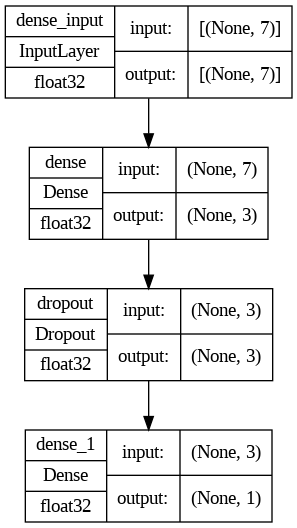

In [19]:
plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [21]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [22]:
history = model.fit(
    x=X_train, y=y_train,
    batch_size=32,
    epochs=200,
    validation_data=(X_val, y_val)
)

Epoch 1/200
10/10 [==============================] - 1s 29ms/step - loss: 22520.2012 - mae: 119.7659 - val_loss: 12456.7461 - val_mae: 111.4909
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 20157.2402 - mae: 112.8477 - val_loss: 10866.3350 - val_mae: 104.1288
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 14842.0254 - mae: 92.9912 - val_loss: 9537.1982 - val_mae: 97.5509
Epoch 4/200
10/10 [==============================] - 0s 6ms/step - loss: 15410.1904 - mae: 97.2333 - val_loss: 8347.8623 - val_mae: 91.2640
Epoch 5/200
10/10 [==============================] - 0s 7ms/step - loss: 13169.1973 - mae: 89.1248 - val_loss: 7292.1763 - val_mae: 85.2963
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 11290.7031 - mae: 81.0662 - val_loss: 6358.6523 - val_mae: 79.6477
Epoch 7/200
10/10 [==============================] - 0s 7ms/step - loss: 9664.5332 - mae: 74.7513 - val_loss: 5567.1245 - val_mae: 74.5237
Epoch 8/200
10

In [23]:
# importando "libs" para visualização gráfica e para ajustes de parâmetros e etc
import matplotlib.pyplot as plt

from pylab import rcParams

%matplotlib inline
# plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
rcParams['figure.figsize'] = 14, 5

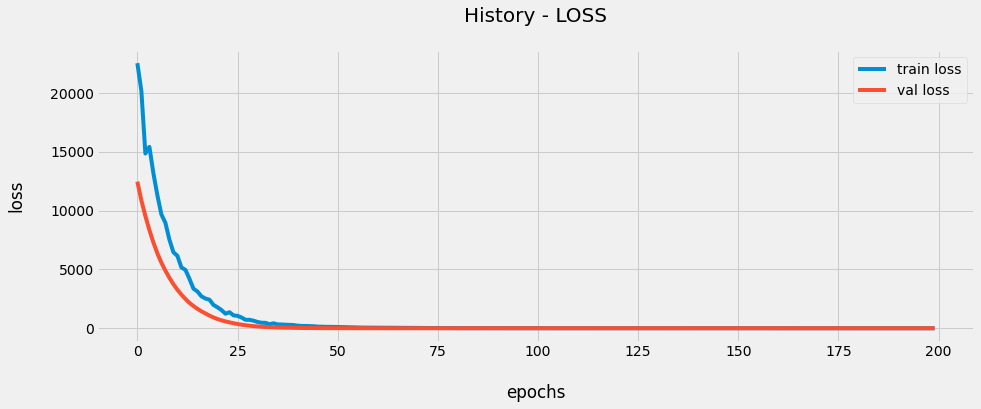

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('History - LOSS\n', size=20)
plt.xlabel('\nepochs')
plt.ylabel('loss\n')
plt.legend(['train loss', 'val loss'])
plt.show()

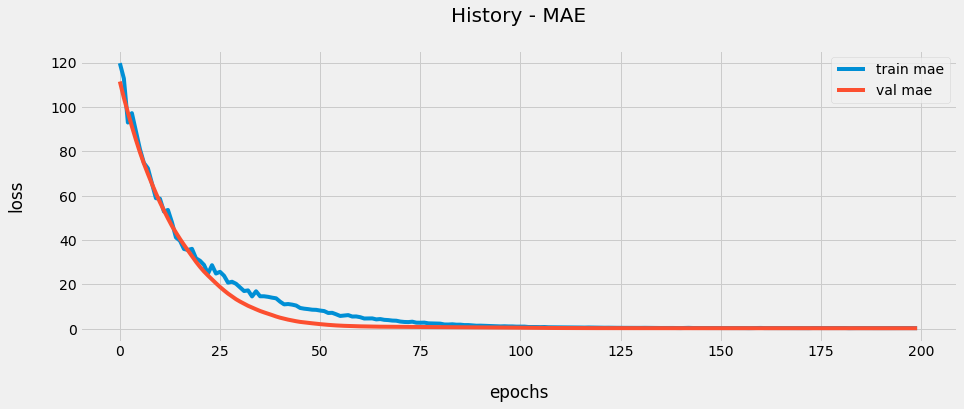

In [25]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

plt.title('History - MAE\n', size=20)
plt.xlabel('\nepochs')
plt.ylabel('loss\n')
plt.legend(['train mae', 'val mae'])
plt.show()

In [26]:
%whos

Variable     Type          Data/Info
------------------------------------
Dense        type          <class 'keras.layers.core.dense.Dense'>
Dropout      type          <class 'keras.layers.regu<...>ization.dropout.Dropout'>
Sequential   type          <class 'keras.engine.sequential.Sequential'>
X            DataFrame          GRE Score  TOEFL Sco<...>n\n[400 rows x 7 columns]
X_train      DataFrame          GRE Score  TOEFL Sco<...>n\n[300 rows x 7 columns]
X_val        DataFrame          GRE Score  TOEFL Sco<...>n\n[100 rows x 7 columns]
df           DataFrame          GRE Score  TOEFL Sco<...>n\n[400 rows x 8 columns]
history      History       <keras.callbacks.History <...>object at 0x7f6ce53a0c40>
keras        module        <module 'keras' from '/us<...>kages/keras/__init__.py'>
model        Sequential    <keras.engine.sequential.<...>object at 0x7f6ceadb79d0>
pd           module        <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plot_model   function      <function plo

In [27]:
%who_ls

['Dense',
 'Dropout',
 'Sequential',
 'X',
 'X_train',
 'X_val',
 'df',
 'history',
 'keras',
 'model',
 'pd',
 'plot_model',
 'plt',
 'rcParams',
 'y',
 'y_train',
 'y_val']